<a href="https://colab.research.google.com/github/rlrocha/paa/blob/main/ep4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático 4
Rafael Rocha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

## Árvore AVL

In [2]:
# Classe nó AVL
class noAVL(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

# Classe Árvore AVL
class arvoreAVL(object):

    # Função para inserir um nó
    def insert_node(self, root, key):

        # Encontra a localização exata e insere o nó
        if not root:
            return noAVL(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)

        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        # Atualiza o fator de balanceamente e o balanceamento da árvore
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)

        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)

        return root

    # Função para deletar o nó
    def delete_node(self, root, key):

        # Encontra o nó a ser deletado e o remove
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root

        # Atualiza o fator de balanceamento dos nós
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))

        balanceFactor = self.getBalance(root)

        # Balanceamento da árvore
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root

    # Função para realizar a rotação a esquerda
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Função para realizar a rotação a direita
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y

    # Obtém a altura do nó
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # Obtém o fator de balanceamento do nó
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)

    def preOrder(self, root):
        if not root:
            return
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)

    # Exibe a árvore
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

def search(root, key, vis=True):
    if root is None:
        if vis:
            print('\nElemento %d não encontrado!' % key)
        return 
    
    if(root.key == key):
        if vis:
            print('\nElemento %d encontrado!' % key)
    if(root.key < key):
        search(root.right, key, vis)
    elif(root.key > key):
        search(root.left, key, vis)

## Árvore Rubro-Negra

In [3]:
# As possíveis cores dos nós
BLACK = 'BLACK'
RED = 'RED'
colors = [BLACK, RED]


class Node:

    def __init__(self, value, color, parent, left=None, right=None):

        assert isinstance(value, int), "Value must be an integer!"    
        assert color in colors, "Sorry, invalid color!"
        self.value  = value
        self.color  = color
        self.parent = parent
        self.left   = left
        self.right  = right

    def __bool__(self):

        if self.value == False:
            return False
        return True

    def __repr__(self):

        if not self.left and not self.right:
            return f'O nó tem valor {self.value} e é {self.color}.\nNão tem filhos e tem {self.parent.value} como nó pai.'
        elif self.left and not self.right:
            return f'O nó tem valor {self.value} e é {self.color}.\nTem {self.left.value} como filho da esquerda e tem {self.parent.value} como nó pai.'
        elif not self.left and self.right:
            return f'O nó tem valor {self.value} e é {self.color}.\nTem {self.right.value} como filho da direita e tem {self.parent.value} como nó pai.'
        else:
            return f'O nó tem valor {self.value} e é {self.color}.\nTem dois filhos, {self.left.value} e {self.right.value} como filhos da esquerda e direita, respectivamente, e também tem {self.parent.value} como nó pai.'

# Usual functions are used to check if there is a root in the tree
# and to call their pair "private" _function. Those two parts could be brought together,
# but are divided for organization purposes.
    
class arvoreRN:
    
    NIL_LEAF = Node(value=False, color=BLACK, parent=None)

    def __init__(self):

        self.root = self.NIL_LEAF

    def __repr__(self):
        if not self.root:
            return ''
        content = '\n'  # to hold final string
        cur_nodes = [self.root]  # all nodes at current level
        cur_height = self.height(self.root)  # height of nodes at current level
        sep = ' ' * (2 ** (cur_height - 1))  # variable sized separator between elements
        while True:
            cur_height += -1  # decrement current height
            if len(cur_nodes) == 0:
                break
            cur_row = ' '
            next_row = ''
            next_nodes = []

            if all(n is None for n in cur_nodes):
                break

            for n in cur_nodes:

                if n == None:
                    cur_row += '   ' + sep
                    next_row += '   ' + sep
                    next_nodes.extend([None, None])
                    continue

                if n.value:
                    buf = ' ' * int((5 - len(str(n.value))) / 2)
                    if n.color == RED:
                        # cur_row += f"{buf}{RED[0], str(n.value)}{buf}" + sep
                        cur_row += '{}{}{}'.format(buf, RED[0]+str(n.value), buf) + sep
                    elif n.color == BLACK:
                        # cur_row += f"{buf}{BLACK[0], str(n.value)}{buf}" + sep
                        cur_row+='{}{}{}'.format(buf, BLACK[0]+str(n.value), buf)+  sep

                else:
                    cur_row += ' ' * 5 + sep

                if n.left:
                    next_nodes.append(n.left)
                    next_row += ' /' + sep
                else:
                    next_row += '  ' + sep
                    next_nodes.append(None)

                if n.right:
                    next_nodes.append(n.right)
                    next_row += '\ ' + sep
                else:
                    next_row += '  ' + sep
                    next_nodes.append(None)

            content += (cur_height * '   ' + cur_row + '\n' + cur_height * '   ' + next_row + '\n')
            cur_nodes = next_nodes
            sep = ' ' * int(len(sep) / 2)  # cut separator size in half
        return content

    def insert(self, value, vis=False):
        if not self.root:
            self.root = Node(value, color=BLACK, parent=self.NIL_LEAF, left=self.NIL_LEAF, right=self.NIL_LEAF)
        else:
            self._insert(value, self.root, vis)

    def _insert(self, value, parent_node, vis):
        
        if value < parent_node.value:
            if not parent_node.left:
                parent_node.left = Node(value, color=RED, parent=parent_node, left=self.NIL_LEAF, right=self.NIL_LEAF)
                self._fixup_insertion(parent_node.left, vis)
            else:
                self._insert(value, parent_node.left, vis)

        elif value > parent_node.value:
            if not parent_node.right:
                parent_node.right = Node(value, color=RED, parent=parent_node, left=self.NIL_LEAF, right=self.NIL_LEAF)
                self._fixup_insertion(parent_node.right, vis)
            else:
                self._insert(value, parent_node.right, vis)

        else:
            raise ValueError('Value already in tree, try another one!')        

    def _fixup_insertion(self, node, vis):  
            while node.parent.color == RED:
                if node.parent == node.parent.parent.left:
                    y = node.parent.parent.right
                    if y.color == RED:
                        node.parent.color = BLACK                           
                        y.color = BLACK                                     
                        node.parent.parent.color = RED                      
                        node = node.parent.parent                           
                    else:
                        if node == node.parent.right:
                            node = node.parent                              
                            self._left_rotate(node)                                                                    
                        node.parent.color = BLACK                           
                        node.parent.parent.color = RED                      
                        self._right_rotate(node.parent.parent)              
                else: # same thing but with 'right' and 'left' exchanged
                    y = node.parent.parent.left
                    if y.color == RED:
                        node.parent.color = BLACK                           
                        y.color = BLACK                                     
                        node.parent.parent.color = RED                      
                        node = node.parent.parent                           
                    else:
                        if node == node.parent.left:
                            node = node.parent                              
                            self._right_rotate(node)                        
                        node.parent.color = BLACK                           
                        node.parent.parent.color = RED                      
                        self._left_rotate(node.parent.parent)               
            self.root.color = BLACK
            if vis:
                print(self) # AQUI

    def delete(self, value):
        if self.root:
            return self._delete(self.find(value))
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _delete(self, node):
        other_node = node
        other_node_original_color = other_node.color
        if not node.left:
            third_node = node.right
            self._transplant(node, node.right)
        elif not node.right:
            third_node = node.left
            self._transplant(node, node.left)
        else:
            other_node == self._minimum_node(node.right)
            other_node_original_color = other_node.color
            third_node = other_node.right
            if other_node.parent == node:
                third_node.parent = other_node
            else:
                self._transplant(other_node, other_node.right)
                other_node.right = node.right
                other_node.right.parent = other_node
            self._transplant(node, other_node)
            other_node.left = node.left
            other_node.left.parent = other_node
            other_node.color = node.color
        if other_node_original_color == BLACK:
            self._fixup_deletion(third_node)
        #print(self) # AQUI


    def _fixup_deletion(self, node):
        while node != self.root and node.color == BLACK:
            if node == node.parent.left:
                other_node = node.parent.right
                if other_node.color == RED:
                    other_node.color == BLACK
                    node.parent.color = RED
                    self._left_rotate(node.parent)
                if other_node.left.color == BLACK and other_node.right.color == BLACK:
                    other_node.color = RED
                    node = node.parent
                else:
                    if other_node.right.color == BLACK:
                        other_node.left.color == BLACK
                        other_node.color == RED
                        self._right_rotate(other_node)
                    other_node.color = node.parent.color
                    node.parent.color = BLACK
                    other_node.right.color = BLACK
                    self._left_rotate(node.parent)
                    node = self.root
            else:
                other_node = node.parent.left
                if other_node.color == RED:
                    other_node.color == BLACK
                    node.parent.color = RED
                    self._right_rotate(node.parent)
                if other_node.right.color == BLACK and other_node.left.color == BLACK:
                    other_node.color = RED
                    node = node.parent
                else:
                    if other_node.left.color == BLACK:
                        other_node.right.color == BLACK
                        other_node.color == RED
                        self._left_rotate(other_node)
                    other_node.color = node.parent.color
                    node.parent.color = BLACK
                    other_node.left.color = BLACK
                    self._right_rotate(node.parent)
                    node = self.root
        node.color = BLACK


    def _transplant(self, node, other_node):
        if not node.parent:
            self.root = other_node
        elif node == node.parent.left:
            node.parent.left = other_node
        else:
            node.parent.right = other_node
        other_node.parent = node.parent

    def maximum(self):
        if self.root:
            return self._maximum(self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _maximum(self, node):
        while node.right:
            node = node.right
        return node.value

    def minimum(self):
        if self.root:
            return self._minimum(self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _minimum(self, node):
        while node.left:
            node = node.left
        return node.value

    def _mininum_node(self, node):
        while node.left:
            node = node.left
        return node

    def _maximum_node(self, node):
        while node.right:
            node = node.right
        return node
        
    def height(self, node):
        if self.root:
            return self._height(self.root, 0)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _height(self, cur_node, cur_height):
        if not cur_node:
            return cur_height
        left_height = self._height(cur_node.left, cur_height + 1)
        right_height = self._height(cur_node.right, cur_height + 1)
        return max(left_height, right_height)

    def black_height(self, node):
        if self.root:
            return self._black_height(self.root, 0)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')
            
    def _black_height(self, cur_node, cur_black_height):
        if not cur_node:
            return cur_black_height

        # If the node's color is black, the function increments it's black_height.
        if cur_node.color == BLACK:
            left_black_height = self._black_height(cur_node.left, cur_black_height + 1)
            right_black_height = self._black_height(cur_node.right, cur_black_height + 1)
        # If the node's color is red, the function goes on to the next node without changing it's black_height.
        else:
            left_black_height = self._black_height(cur_node.left, cur_black_height)
            right_black_height = self._black_height(cur_node.right, cur_black_height)
        return max(left_black_height, right_black_height)

    def find(self, value):
        if self.root:
            return self._find(value, self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _find(self, value, cur_node):
        if value == cur_node.value:
            return cur_node
        elif value < cur_node.value and cur_node.left:
            return self._find(value, cur_node.left)
        elif value >  cur_node.value and cur_node.right:
            return self._find(value, cur_node.right)
        else:
            print('Sorry, value not found!')

    def search(self, value):
        if self.root:
            return self._search(value)
        else:
            return ValueError('The tree is empty! Try again after inserting some values in it.')

    def _search(self, value):
        cur_node = self.root
        if value == self.root.value:
            return True
        elif value < cur_node.value and cur_node.left:
            return self._search(value, cur_node.left)
        elif value >  cur_node.value and cur_node.right:
            return self._search(value, cur_node)
        else:
            return False

    def _left_rotate(self, node):
        other_node = node.right
        node.right = other_node.left
        if other_node.left:
            other_node.left.parent = node
        other_node.parent = node.parent
        if not node.parent:
            self.root = other_node
        elif node == node.parent.left:
            node.parent.left = other_node
        else:
            node.parent.right = other_node
        other_node.left = node
        node.parent = other_node        

    def _right_rotate(self, node):
        other_node = node.left
        node.left = other_node.right
        if other_node.right:
            other_node.right.parent = node
        other_node.parent = node.parent
        if not node.parent:
            self.root = other_node
        elif node == node.parent.right:
            node.parent.right = other_node
        else:
            node.parent.left = other_node
        other_node.right = node
        node.parent = other_node

## Exemplo Árvore AVL

In [4]:
x_lista = [33, 13, 52, 9, 21, 61, 8, 11]

avl = arvoreAVL()
avl_raiz = None

# Inserir elemento
for x in x_lista:
    avl_raiz = avl.insert_node(avl_raiz, x)

print('Árvore AVL:\n')
avl.printHelper(avl_raiz, "", True)

# Buscar elemento
key = 13
search(avl_raiz, key, vis=True)

Árvore AVL:

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61

Elemento 13 encontrado!


## Exemplo Árvore Rubro-Negra

In [5]:
x_lista = [33, 13, 52, 9, 21, 61, 8, 11]
    
rn = arvoreRN()

# Inserir elemento
for x in x_lista:
    if x == x_lista[len(x_lista)-1]:
        # Se o elemento atual é o último elemento, então exiba a árvore
        print('Árvore Rubro-Negra:\n')
        rn.insert(x, vis=True)
    else:
        rn.insert(x, vis=False)

print('\n')

# Buscar elmento
key = 13
rn.find(key)

Árvore Rubro-Negra:


           B33         
          /        \         
        R13      B52     
       /    \           \     
      B9     B21         R61   
    /  \                        
   R8    R11                          
                                    





O nó tem valor 13 e é RED.
Tem dois filhos, 9 e 21 como filhos da esquerda e direita, respectivamente, e também tem 33 como nó pai.

## Definição da quantidade de nós
As quantidades de nós das árvores variam de 100 a 10000 com passos de 100.

In [6]:
n_lista = np.arange(100, 10100, 100)

print('Quantidade de nós: ', n_lista)

Quantidade de nós:  [  100   200   300   400   500   600   700   800   900  1000  1100  1200
  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400
  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600
  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800
  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900  6000
  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100  7200
  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300  8400
  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500  9600
  9700  9800  9900 10000]


## Resultados e Análise da Complexidade dos Algoritmos
Tanto a árvore AVL quanto a árvore rubro-negra apresentam a mesma complexidade na inserção e na busca. As operações de inserção e busca apresentam a seguinte complexidade:
\begin{equation*}
log(n)
\end{equation*}
Onde *n* é a quantidade de nós na árvore.

Apesar disso, ao analisar o tempo de execução da operação inserção em ambas as árvores, nota-se que a árvore rubro-negra é ligeiramente mais eficiente, em termos de tempo de inserção, que a árvore AVL. Porém, ao analisar o método de busca nas árvores, observa-se que a árvore AVL é mais eficiente, apesar do tempo de busca ser obtido em uma escala pequena (e^-5).

In [7]:
T_avlInsert = []
T_avlSearch = []

T_rnInsert = []
T_rnSearch = []

for n in n_lista:
    x_vetor = np.random.permutation(np.arange(1, 10001, 1)) # Permutação de valores de 1 até 10000.
    x_vetor = x_vetor[0:n] # 
    
    key = np.random.choice(x_vetor) # Elemento aleatório a ser buscado
    #key = x_vetor[len(x_vetor)-1]
    
    # AVL
    avl = arvoreAVL()
    avl_raiz = None
    
    start_time = time.time()
    for x in x_vetor:
        avl_raiz = avl.insert_node(avl_raiz, x)
    t = time.time() - start_time # Tempo de execução Insert
    T_avlInsert.append(t)
    
    start_time = time.time()
    search(avl_raiz, key, vis=False)
    t = time.time() - start_time # Tempo de execução Search
    T_avlSearch.append(t)
    
    # Rubro-Negra
    rn = arvoreRN()
    
    start_time = time.time()
    for x in x_vetor.tolist():
        rn.insert(x)
    t = time.time() - start_time # Tempo de execução
    T_rnInsert.append(t)
    
    start_time = time.time()
    rn.find(key)
    t = time.time() - start_time # Tempo de execução Search
    T_rnSearch.append(t)

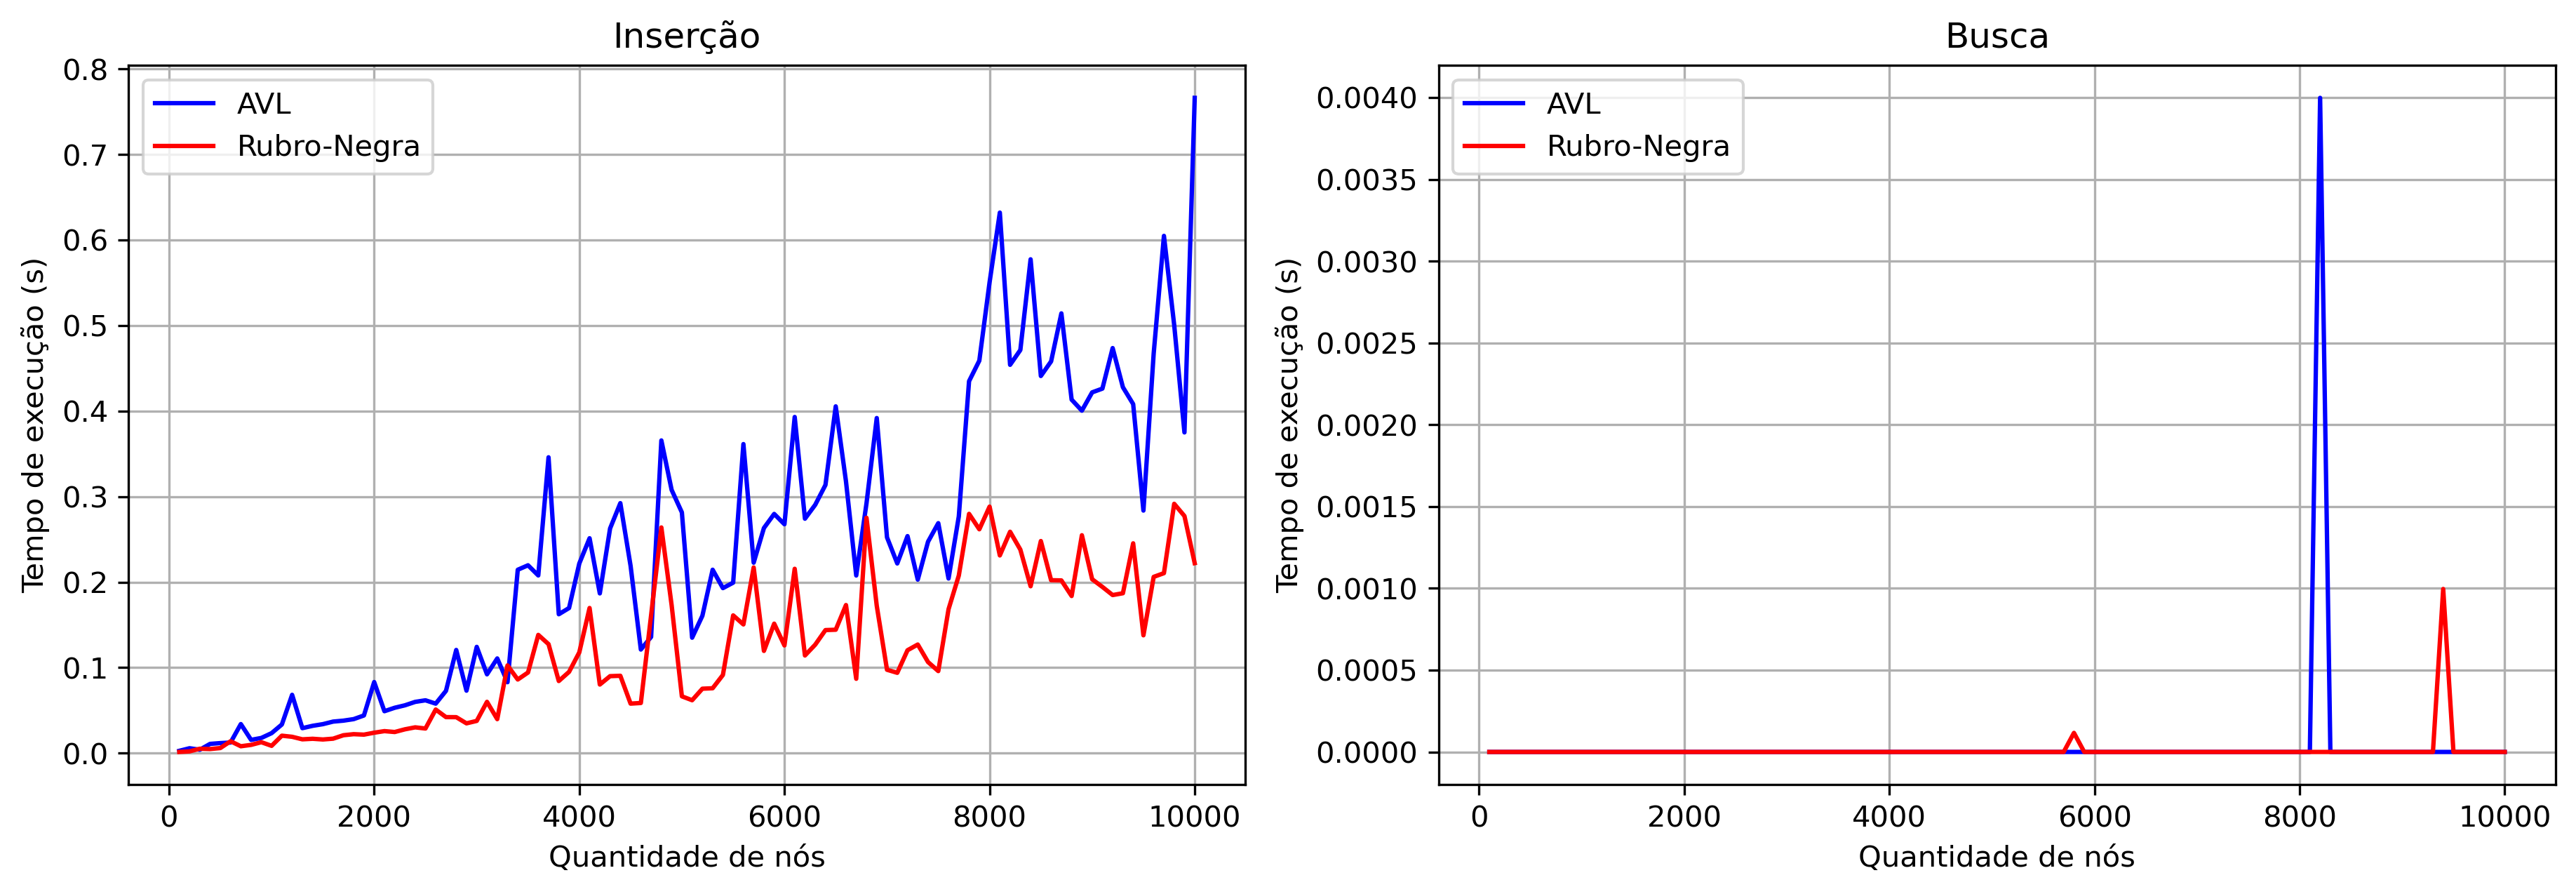

In [11]:
fig_luz, axes = plt.subplots(1,2, figsize=(8,4), dpi=300)
plt.tight_layout()

axes[0].plot(n_lista, T_avlInsert, color='blue')
axes[0].plot(n_lista, T_rnInsert, color='red')
axes[0].set_xlabel('Quantidade de nós')
axes[0].set_ylabel('Tempo de execução (s)')
axes[0].set_title('Inserção')
axes[0].grid()
axes[0].legend(['AVL', 'Rubro-Negra'])

axes[1].plot(n_lista, T_avlSearch, color='blue')
axes[1].plot(n_lista, T_rnSearch, color='red')
axes[1].set_xlabel('Quantidade de nós')
axes[1].set_ylabel('Tempo de execução (s)')
axes[1].set_title('Busca')
axes[1].grid()
axes[1].legend(['AVL', 'Rubro-Negra'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep4/ep4_analise.png', dpi=300, bbox_inches = 'tight')
plt.show()